In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-math-symbols/dataset/.directory
/kaggle/input/handwritten-math-symbols/dataset/7/h2oADiw9.png
/kaggle/input/handwritten-math-symbols/dataset/7/i41zVQ0G.png
/kaggle/input/handwritten-math-symbols/dataset/7/JW2ti3bD.png
/kaggle/input/handwritten-math-symbols/dataset/7/2675.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/96357.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/25946.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/6vLGEJcM.png
/kaggle/input/handwritten-math-symbols/dataset/7/62062.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/6458.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/68305.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/41510.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/68994.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/58.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/86018.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/34107.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/2

In [3]:
Name=['7', '2', '5', 'div', '8', '0', 'add', '3', 'eq', 'dec', 'sub', '1', '4', '9', 'mul', '6']

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
directory = '../input/handwritten-math-symbols/dataset'

In [6]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<500:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [7]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [9]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(5706, 100, 100, 3)
(1427, 100, 100, 3)
(5706, 16)
(1427, 16)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [14]:
# using sequential model for training
model = Sequential()

# 1st layer and taking input in this of shape 100x100x3 ->  100 x 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting by making it hard for the model to idenify the images
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

# last layer predicts 16 labels
model.add(Dense(16, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)       

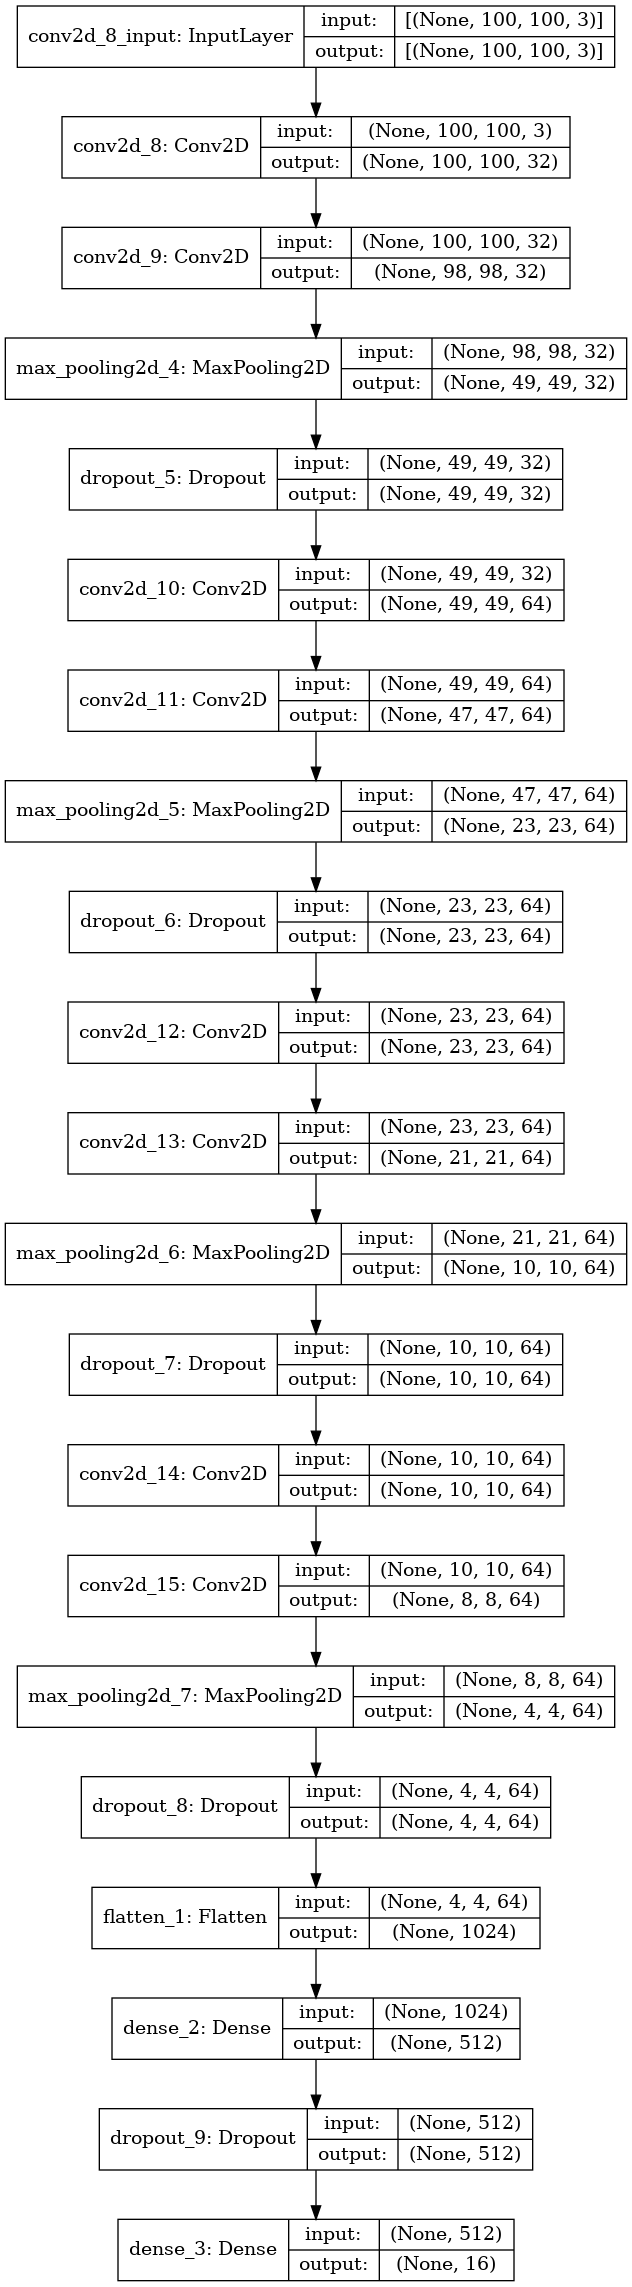

In [15]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)
#keras.utils.plot_model(model, "model.png", show_shapes=True)

In [16]:
# training the model
history = model.fit(
    trainx,
    trainy,
    batch_size=50,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

2022-11-21 14:11:27.520217: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 547680000 exceeds 10% of free system memory.
2022-11-21 14:11:28.174461: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 547680000 exceeds 10% of free system memory.
2022-11-21 14:11:28.645451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-21 14:11:30.752166: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


92/92 [==============================] - 14s 49ms/step - loss: 2.4022 - accuracy: 0.1928 - val_loss: 1.3532 - val_accuracy: 0.5919
Epoch 2/100
92/92 [==============================] - 3s 36ms/step - loss: 1.0701 - accuracy: 0.6518 - val_loss: 0.7562 - val_accuracy: 0.7636
Epoch 3/100
92/92 [==============================] - 3s 36ms/step - loss: 0.6999 - accuracy: 0.7756 - val_loss: 0.5307 - val_accuracy: 0.8371
Epoch 4/100
92/92 [==============================] - 3s 35ms/step - loss: 0.5029 - accuracy: 0.8372 - val_loss: 0.2580 - val_accuracy: 0.9194
Epoch 5/100
92/92 [==============================] - 4s 39ms/step - loss: 0.3568 - accuracy: 0.8907 - val_loss: 0.1827 - val_accuracy: 0.9413
Epoch 6/100
92/92 [==============================] - 3s 36ms/step - loss: 0.2584 - accuracy: 0.9178 - val_loss: 0.1687 - val_accuracy: 0.9431
Epoch 7/100
92/92 [==============================] - 3s 36ms/step - loss: 0.2309 - accuracy: 0.9281 - val_loss: 0.1633 - val_accuracy: 0.9518
Epoch 8/100
92/92

In [17]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        45
           3       0.99      0.97      0.98       106
           4       1.00      0.99      0.99        89
           5       0.95      1.00      0.97        92
           6       0.99      1.00      1.00       102
           7       1.00      0.98      0.99        85
           8       0.98      0.98      0.98        95
           9       1.00      1.00      1.00       131
          10       0.99      1.00      1.00       107
          11       0.99      0.99      0.99        86
          12       0.98      0.98      0.98        84
          13       1.00      0.99      0.99        71
          14       0.99      0.99      0.99       101
          15       0.98      0.98      0.98        93

    accuracy                           0.99      1427
   macro avg       0.99   

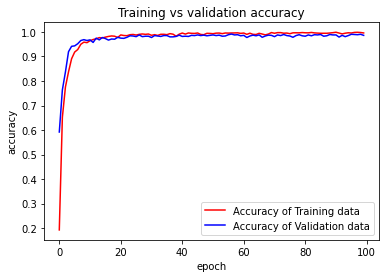

<Figure size 432x288 with 0 Axes>

In [18]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()
#plt.savefig("Train_val_accuracy.png")

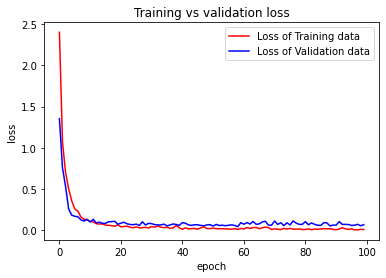

<Figure size 432x288 with 0 Axes>

In [19]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()
#plt.savefig("Train_val_loss", facecolor='y', bbox_inches="tight",           pad_inches=0.3, transparent=True)
#plt.savefig("Train_val_loss.png")

In [20]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 7.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


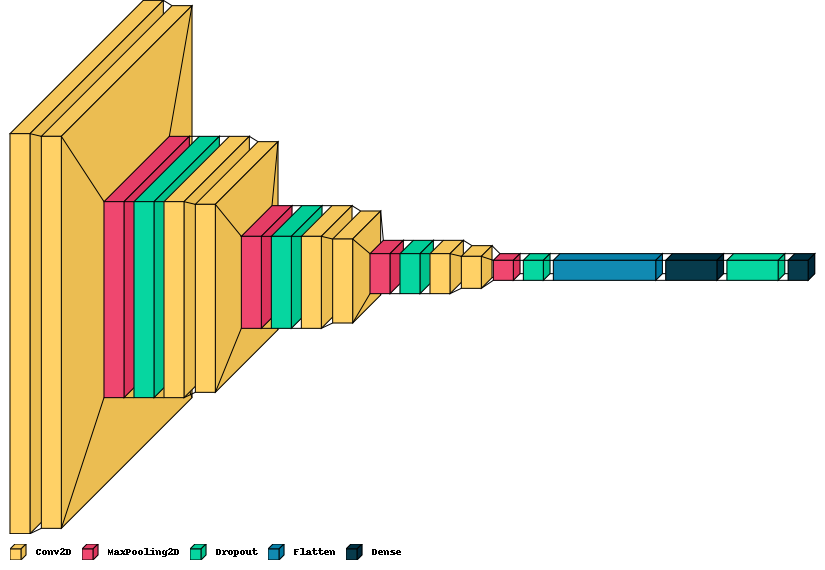

In [21]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom fon


In [22]:
model.save("final_model.h5")

In [23]:
def sliding_window(image):
    slices = []
    start=0
    stop=0
    for i in range(5):
        
        dim = 100
        if i > 0:
            start = stop
        else:
            start = 0
        
        stop = start + dim
        
        if stop > image.shape[1]:
            stop = image.shape[1]
        
        slices.append(image[:, start:stop])
        
    return slices

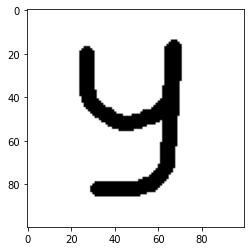

In [51]:
slices = sliding_window(equ)
plt.imshow(slices[2])

In [24]:
def pred(max):
    arr= img_to_array(max)
    arr=arr/255.0
    prediction_image1=np.array(arr)
    prediction_image1= np.expand_dims(arr, axis=0)
    prediction=model.predict(prediction_image1)
    value=np.argmax(prediction)
    move_name=mapper(value)
    if(move_name == 'add'):
        val = "+"
        return val
    if(move_name == 'mul'):
        val = "X"
        return val
    if(move_name == 'eq'):
        val = "="
        return val
    if(move_name == 'sub'):
        val = "-"
        return val
    if(move_name == 'div'):
        val = "/"
        return val
    else:
        return move_name

In [25]:
from IPython.display import HTML as html_print


def cstr(s, color='black', size='100'):
    return "<text style=color:{};font-size:{}%>{}</text>".format(
        color, size, s)


def pred_equ(image):
    image_list = sliding_window(image)
    predictions = []
    for i in range(len(image_list)):
        matx = image_list[i]
        predictions.append(pred(matx)[0])
    s = ''
    return html_print(cstr(s.join(predictions), color='black', size='150'))

(100, 500, 3)


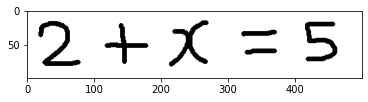

In [65]:
#pred_equ
from skimage import io
from skimage.transform import rescale
equ = io.imread("../input/guihand/image.png")

#equ = cv2.resize(equ,(500,100))
print(equ.shape)
plt.imshow(equ);

In [66]:
result = pred_equ(equ)
print("Prediction is ")
result
#print(plt.imshow(equ))

Prediction is 


**Below Refernce use**

In [41]:
img=slices[4]
arr= img_to_array(img)
arr=arr/255.0
prediction_image1=np.array(arr)
prediction_image1= np.expand_dims(arr, axis=0)

NameError: name 'slices' is not defined

In [31]:
prediction=model.predict(prediction_image1)
value=np.argmax(prediction)
move_name=mapper(value)
#print(move_name)
print("Prediction is {}.".format(move_name))

NameError: name 'prediction_image1' is not defined

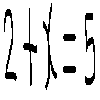

In [30]:
load_img("../input/guihand/image.png",target_size=(100,100))

In [29]:
image=load_img("../input/guihand/image.png",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))